In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


img_board = cv2.imread('assets/5x5.jpg')
img_board = cv2.rotate(img_board, cv2.ROTATE_90_COUNTERCLOCKWISE)
img_board_gray = cv2.cvtColor(img_board, cv2.COLOR_BGR2GRAY)
h,w = img_board_gray.shape
background_thresh = img_board_gray[0][0]
ADD_THRESH = 90
blur = cv2.GaussianBlur(img_board_gray,(5,5),0)
total_thresh = background_thresh + ADD_THRESH
_,thresh_img = cv2.threshold(blur,total_thresh,255,cv2.THRESH_BINARY)
contours, hier = cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
top_25_contours = sorted(contours, key=lambda x : cv2.contourArea(x) if cv2.contourArea(x) < (h * w)/25 else 0,reverse=True)[:25]

sorted_contours = []
sorted_hier = []


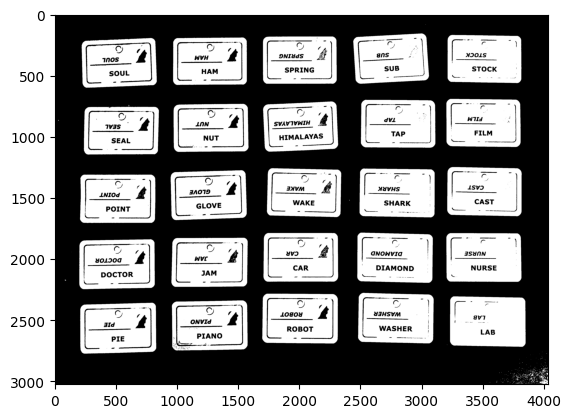

In [18]:
print_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
plt.imshow(print_img)


In [20]:
cv2.drawContours(print_img, top_25_contours, -1, (0, 255, 0), 3)
imS = cv2.resize(print_img, (960, 540)) 
cv2.imshow('Contours', imS)
cv2.waitKey(0)

-1